##### Step B Data preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
images = np.load('images.npy')
print(images.shape)

labels = pd.read_csv('labels.csv')
labels.sample(10)

(4750, 128, 128, 3)


,Label
3091,Scentless Mayweed
3493,Sugar beet
1173,Shepherds Purse
3696,Maize
3680,Maize
2876,Scentless Mayweed
827,Fat Hen
1280,Common wheat
4665,Loose Silky-bent
2931,Scentless Mayweed


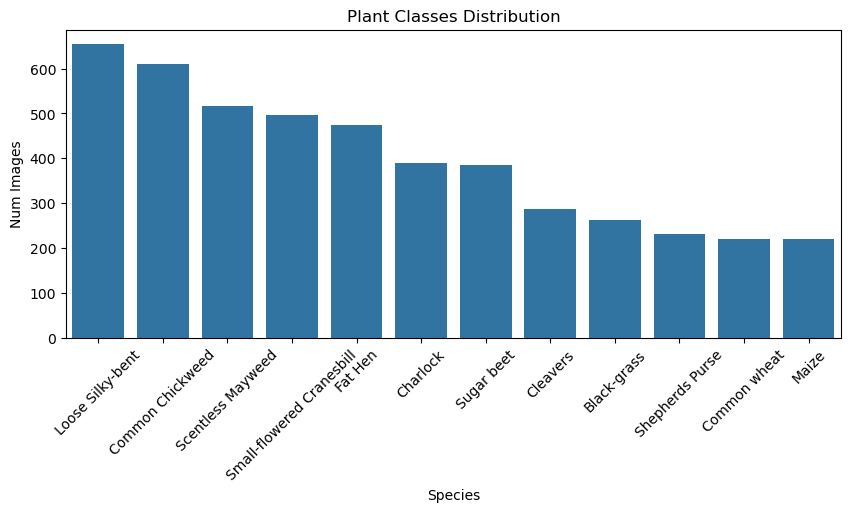

In [3]:
#B1a)
plt.figure(figsize=(10,4))
sns.countplot(x=labels['Label'], order=labels['Label'].value_counts().index)

plt.title('Plant Classes Distribution')
plt.xlabel('Species')
plt.ylabel('Num Images')
plt.xticks(rotation=45)
plt.show()

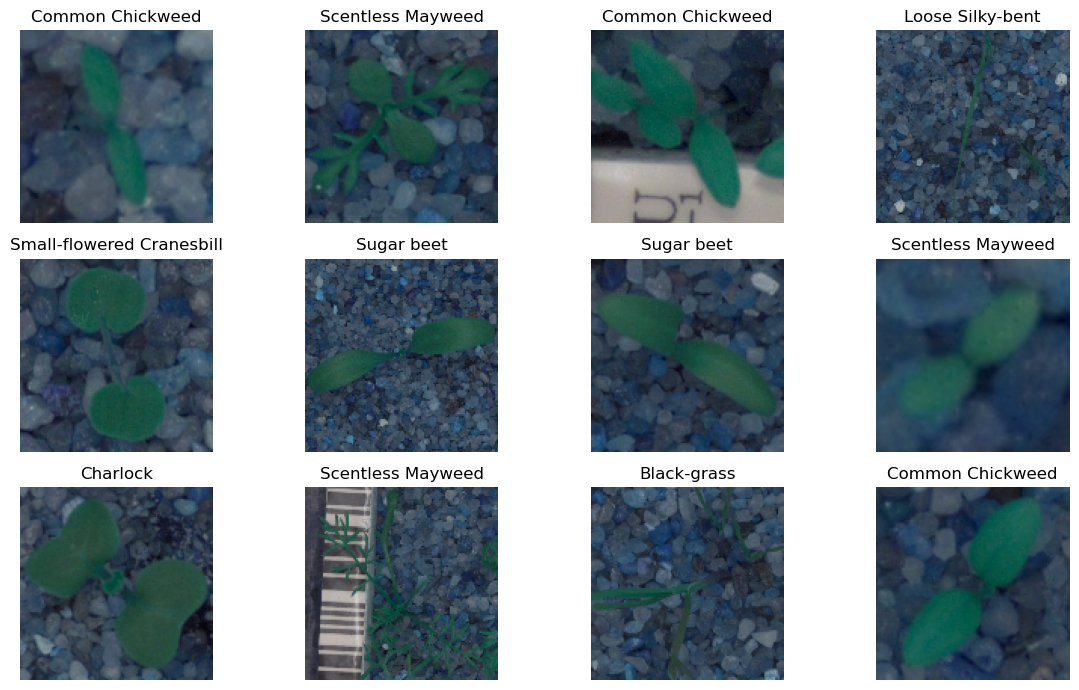

In [4]:
#B1b)
num_images = 12
plt.figure(figsize=(12,7))

indices = random.sample(range(len(images)), num_images)

for x, inx in enumerate(indices):
    plt.subplot(3, 4, x + 1)
    plt.imshow(images[inx].astype(np.uint8))
    plt.title(labels['Label'][inx])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [5]:
#B2) Data Augmentation - helps to create variations of images by applying random transformations which helps the model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range = 30,     #at random rotates the image 30 degrees
        width_shift_range = 0.1, #at random shifts the image 10% its width
        height_shift_range=0.1,  #same thing with its height
        zoom_range = 0.2,        #randomly zooms the image up to 20%
        horizontal_flip = True,  #flips the image horizontally 
        brightness_range = (0.8, 1.2))  #adjusting the brightness 80% to 120% 

In [7]:
#B3) Normalizing the images - Why? because the model learns faster when input features are on same or similar scale
images_normalized = images / 255.0

print(images_normalized.min())
print(images_normalized.max())

0.0
1.0


In [10]:
#B4) Perform train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

#B5) 
#neural network doesn't understand the different plants in name it has to work in numbers
# Common Chickweed becomes 0, Scentless Mayweed becomes 1, Loose Silky-bent becomes 2 and so on
label_encoder = LabelEncoder() #label encoding 
labels_encoded = label_encoder.fit_transform(labels['Label'])
labels_categorical = to_categorical(labels_encoded) #turns the numbers into binary format known as OneHot Encoding

#B4) train-validation-test ((it is recommended to perform encoding before train-test split) split 20% for test
X_temp, X_test, y_temp, y_test = train_test_split(images_normalized, labels_categorical, test_size=0.2, random_state=42, stratify=labels_encoded)

# ok now from the remaining 80% of training, take 25% as validation
# note from the original dataset this is 60 for training, 20 for test and 20 for validation
labels_encoded_temp = np.argmax(y_temp, axis=1) 
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=labels_encoded_temp)

print("Training:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Training: (2850, 128, 128, 3) (2850, 12)
Validation: (950, 128, 128, 3) (950, 12)
Test: (950, 128, 128, 3) (950, 12)


In [11]:
#B5) Encode target y features is already done before train-test split
print("labels_encoded:", labels_encoded.shape)
print("First 10 encoded labels:", labels_encoded[:10])
print()
print("Shape of labels_categorical:", labels_categorical.shape) #4750 images and 12 classes
print("First 10 one-hot encoded labels:", labels_categorical[:10])
print()
print("Original class names corresponding to encoded labels:")
for x, y in enumerate(label_encoder.classes_):
    print(f"{x}: {y}")

labels_encoded: (4750,)
First 10 encoded labels: [10 10 10 10 10 10 10 10 10 10]

Shape of labels_categorical: (4750, 12)
First 10 one-hot encoded labels: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]

Original class names corresponding to encoded labels:
0: Black-grass
1: Charlock
2: Cleavers
3: Common Chickweed
4: Common wheat
5: Fat Hen
6: Loose Silky-bent
7: Maize
8: Scentless Mayweed
9: Shepherds Purse
10: Small-flowered Cranesbill
11: Sugar beet


In [13]:
#B6) copy of all datasets
np.save('images_normalized.npy', images_normalized)
np.save('labels_encoded.npy', labels_encoded)
np.save('labels_categorical.npy', labels_categorical)

np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)
np.save('X_val.npy', X_val)
np.save('y_val.npy', y_val)
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

##### Step E Network Architecture

In [14]:
num_classes = y_train.shape[1] #number of classes
num_classes #12

12

In [15]:
images.shape #(4750, 128, 128, 3)

(4750, 128, 128, 3)

In [16]:
#E1 Model Summary

#defining the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

num_classes = labels['Label'].nunique()

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(128, 128, 3)))  # Layer 1
model.add(MaxPool2D(pool_size=(2, 2)))  # Layer 2
model.add(Dropout(0.25))   # Layer 3

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))   # Layer 4
model.add(MaxPool2D(pool_size=(2, 2)))  # Layer 5
model.add(Dropout(0.25))  # Layer 6

model.add(Flatten())   # Layer 7
model.add(Dense(256, activation='relu'))  # Layer 8
model.add(Dropout(0.5))   # Layer 9
model.add(Dense(num_classes, activation='softmax'))  # Layer 10 (output)

model.summary()

#Code came from Kaggle https://www.kaggle.com/code/kanncaa1/convolutional-neural-network-cnn-tutorial

C:\Users\btemo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      16,777,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │           3,084 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,801,484 (64.09 MB)

 Trainable params: 16,801,484 (64.09 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Model Training
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, batch_size=32, #empoch = number of passes over data, batch = samples per training
                    validation_data=(X_test, y_test))

Epoch 1/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 389ms/step - accuracy: 0.1286 - loss: 3.0115 - val_accuracy: 0.3421 - val_loss: 2.3439
Epoch 2/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 366ms/step - accuracy: 0.3616 - loss: 2.0031 - val_accuracy: 0.4053 - val_loss: 1.8127
Epoch 3/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 346ms/step - accuracy: 0.4530 - loss: 1.5687 - val_accuracy: 0.4579 - val_loss: 1.5542
Epoch 4/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 361ms/step - accuracy: 0.4772 - loss: 1.4986 - val_accuracy: 0.4716 - val_loss: 1.5489
Epoch 5/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 34s 376ms/step - accuracy: 0.5900 - loss: 1.1814 - val_accuracy: 0.6495 - val_loss: 1.1586
Epoch 6/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 367ms/step - accuracy: 0.6420 - loss: 1.0320 - val_accuracy: 0.6716 - val_loss: 0.9922
Epoch 7/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 369ms/step - accuracy: 0.6289 - loss: 1.0673 - val_accuracy: 0.6884 - val_loss: 0.9976
Epoch 8/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 371ms/step - accuracy: 0.6552 - loss: 0.9828 - val_accu

In [18]:
print(history.history['loss'])
print()
print(history.history['val_loss'])

[2.5674893856048584, 1.861857295036316, 1.4727181196212769, 1.3690464496612549, 1.1780204772949219, 1.0514987707138062, 1.0135438442230225, 0.9546195864677429, 0.85505610704422, 0.8690064549446106, 0.7874555587768555, 0.6815820932388306, 0.625420331954956, 0.6099554300308228, 0.5602815747261047]

[2.3438961505889893, 1.8126957416534424, 1.5542093515396118, 1.548851490020752, 1.1585601568222046, 0.992244303226471, 0.9975501894950867, 1.007049322128296, 0.9191200137138367, 0.949479341506958, 0.8935060501098633, 0.9333274960517883, 0.9751440286636353, 1.0245743989944458, 1.0749859809875488]


In [19]:
#E4 Confusion matrix
from sklearn.metrics import confusion_matrix

y_pred_probs = model.predict(X_test)  #prediction probabilities on test set
y_pred = np.argmax(y_pred_probs, axis=1) # convert those back to the classes
y_true = np.argmax(y_test, axis=1)  # and convert one-hot
confusion_matrix(y_true, y_pred)


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step


array([[ 13,   0,   0,   0,   5,   3,  30,   0,   0,   0,   1,   1],
       [  0,  72,   3,   0,   0,   0,   0,   0,   1,   0,   2,   0],
       [  0,  13,  36,   0,   0,   2,   0,   0,   6,   1,   0,   0],
       [  0,   2,   0,  91,   1,   1,   0,   4,   9,  11,   2,   1],
       [  4,   1,   2,   0,  15,   3,  10,   0,   8,   0,   0,   1],
       [  0,   7,   7,   2,   2,  59,   1,   0,   5,   6,   3,   3],
       [  8,   0,   0,   0,   1,   9, 106,   0,   4,   0,   0,   3],
       [  0,   1,   0,   3,   0,   0,   0,  26,   7,   7,   0,   0],
       [  1,   4,   1,   0,   0,   0,   0,   0,  88,   5,   0,   4],
       [  0,   3,   1,   2,   0,   1,   0,   1,   9,  27,   2,   0],
       [  0,   3,   0,   0,   0,   1,   1,   1,   1,  10,  81,   1],
       [  0,   9,   1,   1,   0,   7,   0,   2,  13,   3,   5,  36]],
      dtype=int64)

##### Step F Model Evaluation

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

                           precision    recall  f1-score   support

              Black-grass       0.50      0.25      0.33        53
                 Charlock       0.63      0.92      0.75        78
                 Cleavers       0.71      0.62      0.66        58
         Common Chickweed       0.92      0.75      0.82       122
             Common wheat       0.62      0.34      0.44        44
                  Fat Hen       0.69      0.62      0.65        95
         Loose Silky-bent       0.72      0.81      0.76       131
                    Maize       0.76      0.59      0.67        44
        Scentless Mayweed       0.58      0.85      0.69       103
          Shepherds Purse       0.39      0.59      0.47        46
Small-flowered Cranesbill       0.84      0.82      0.83        99
               Sugar beet       0.72      0.47      0.57        77

                 accuracy                           0.68       950
                macro avg       0.67      0.64      0.64    

In [21]:
#F2B training against validation dataset
#fit the model now on the validation data
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 34s 381ms/step - accuracy: 0.7989 - loss: 0.5640 - val_accuracy: 0.6874 - val_loss: 1.0493
Epoch 2/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 365ms/step - accuracy: 0.8298 - loss: 0.4775 - val_accuracy: 0.7253 - val_loss: 0.9379
Epoch 3/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 366ms/step - accuracy: 0.8450 - loss: 0.4320 - val_accuracy: 0.7137 - val_loss: 0.9450
Epoch 4/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 363ms/step - accuracy: 0.8487 - loss: 0.4268 - val_accuracy: 0.7316 - val_loss: 0.9000
Epoch 5/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 365ms/step - accuracy: 0.8638 - loss: 0.3682 - val_accuracy: 0.6705 - val_loss: 1.0573
Epoch 6/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 364ms/step - accuracy: 0.8547 - loss: 0.4060 - val_accuracy: 0.7189 - val_loss: 1.0072
Epoch 7/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 32s 356ms/step - accuracy: 0.8742 - loss: 0.3259 - val_accuracy: 0.7063 - val_loss: 1.0312
Epoch 8/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 367ms/step - accuracy: 0.8918 - loss: 0.2967 - val_accu

In [24]:
#Confusion metric on validation dataset
val_pred_probs = model.predict(X_val)  #prediction probabilities on validation set
val_pred = np.argmax(val_pred_probs, axis=1) # convert those back to the classes
val_true = np.argmax(y_val, axis=1)  # and convert one-hot
confusion_matrix(val_true, val_pred)

30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step


array([[ 9,  0,  0,  0,  7,  0, 31,  2,  1,  0,  0,  3],
       [ 0, 72,  1,  0,  1,  2,  0,  0,  0,  0,  2,  0],
       [ 0,  9, 44,  0,  0,  1,  0,  0,  1,  1,  1,  0],
       [ 0,  0,  0, 99,  0,  0,  0,  1, 13,  3,  6,  0],
       [ 0,  0,  3,  0, 22,  4,  9,  0,  3,  0,  0,  3],
       [ 0,  3,  9,  1,  0, 62,  4,  0,  5,  1,  5,  5],
       [13,  0,  0,  0,  3, 10, 96,  0,  3,  2,  2,  2],
       [ 0,  4,  0,  2,  1,  0,  1, 25,  5,  1,  3,  2],
       [ 0,  7,  7,  1,  1,  3,  0,  0, 69,  4,  0, 11],
       [ 0,  2,  1,  2,  0,  3,  0,  2,  8, 25,  3,  0],
       [ 0,  4,  0,  1,  0,  1,  0,  3,  0,  1, 90,  0],
       [ 0,  6,  2,  0,  0,  3,  0,  1,  9,  0,  3, 53]], dtype=int64)

In [25]:
#classification report
print(classification_report(val_true, val_pred, target_names=label_encoder.classes_))

                           precision    recall  f1-score   support

              Black-grass       0.41      0.17      0.24        53
                 Charlock       0.67      0.92      0.78        78
                 Cleavers       0.66      0.77      0.71        57
         Common Chickweed       0.93      0.81      0.87       122
             Common wheat       0.63      0.50      0.56        44
                  Fat Hen       0.70      0.65      0.67        95
         Loose Silky-bent       0.68      0.73      0.71       131
                    Maize       0.74      0.57      0.64        44
        Scentless Mayweed       0.59      0.67      0.63       103
          Shepherds Purse       0.66      0.54      0.60        46
Small-flowered Cranesbill       0.78      0.90      0.84       100
               Sugar beet       0.67      0.69      0.68        77

                 accuracy                           0.70       950
                macro avg       0.68      0.66      0.66    

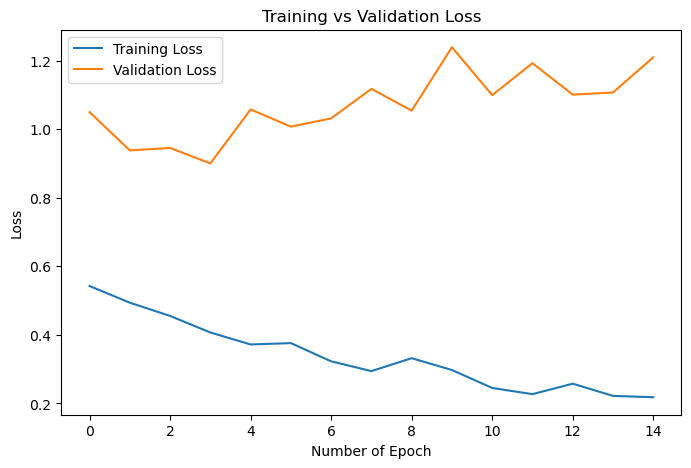

In [26]:
#F1c
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Number of Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
#G1 
# this saves the entire model
model.save('plant_classifier_model.h5')